In [1]:
import sys
sys.path.append('/usr/local/lib/python2.7/dist-packages')
sys.path.append('/usr/local/lib/python3.5/dist-packages')
sys.path

['/home/ga96kub/3d_retrieval',
 '/opt/anaconda3/lib/python37.zip',
 '/opt/anaconda3/lib/python3.7',
 '/opt/anaconda3/lib/python3.7/lib-dynload',
 '',
 '/opt/anaconda3/lib/python3.7/site-packages',
 '/opt/anaconda3/lib/python3.7/site-packages/IPython/extensions',
 '/home/ga96kub/.ipython',
 '/usr/local/lib/python2.7/dist-packages',
 '/usr/local/lib/python3.5/dist-packages']

In [2]:
import create_dict
import torch
import os
import json
import utils
import numpy as np

# Clean Data

In [ ]:
#folder_name = '/data2'
#create_dict.clean_obj(folder_name)

# Generate Dataset

In [ ]:
#!pip3 freeze | grep PyWavefront

In [ ]:
#import pywavefront
#mesh2 = pywavefront.Wavefront('/home/.schramm/Documents/3d_retrieval/data/02747177/8bdea15ae5d929d0a2eb129d649f68cf/models/model_normalized.obj', collect_faces='True')


In [ ]:
input_folder = '/data'
suffix = '_allClasses1000_points2500' #suffix will append data_trainxxxx.json
max_elements_per_class = 1000
create_dict.create_dictionary(input_folder, max_elements_per_class, suffix, points_per_object=2500)

# Initialize Network

In [3]:
import SiameseNet

device = torch.device("cuda:0" if torch.cuda.torch.cuda.is_available() else "cpu")

batch_size = 16
net = SiameseNet.SiameseNet(batch_size)
suffix = '_allClasses1000_points2500' # comment in if not coming from generating the dataset
path_to_params = "models/_allCl1000_P2500_BS16.pt" # if file does not exist or is empty it starts from untrained and later saves to the file

# shift to GPU if available

net.to(device)
working_dir = os.getcwd()
data_dir_train = os.path.join(working_dir, 'data_train'+suffix+'.json')
data_dir_val = os.path.join(working_dir, 'data_val'+suffix+'.json')
class_dir = os.path.join(working_dir, 'class_dict'+suffix+'.json')

if os.path.isfile(path_to_params):
    if os.stat(path_to_params).st_size != 0:
        net.load_state_dict(torch.load(path_to_params, map_location=device))  #Loads pretrained net if file exists and if not empty
else:
    open(path_to_params, "x") #Creates parameter file if it does not exist

In [ ]:
device

# Train Network

In [ ]:
#training parameters

writer_suffix = 'allC1000_LRe-3_MR05_classLoss'
margin = 0.5
num_epochs = 100
print_batch = 30
lr = 0.001



In [ ]:
net = SiameseNet.train(net, num_epochs, margin, lr, print_batch, 
                       data_dir_train, data_dir_val, writer_suffix, path_to_params, working_dir, class_dir)

# Validation

In [5]:
margin = 0.5
writer_suffix = 'allC1000_LRe-3_MR05'
SiameseNet.val(net, margin, data_dir_val, writer_suffix, working_dir, class_dir, k=5,  images=False)

Loaded 5032 word vectors.
Number of validation triplets: 934
Doing Evaluation
0 [327 785 750 832 589]
1 [286 557   2 569 882]
2 [429   2 286 239 882]
3 [900 474 245  70 142]
4 [265 640 726 347 736]
5 [755 879 847 692 195]
6 [554 388  42 749 861]
7 [779 629 782 276 560]
8 [389 547 846 533 826]
9 [  9  30  81 328  69]
10 [779 629 431 782 560]
11 [269 189 259 709 915]
12 [389 547 846 826 544]
13 [ 28 427 165  30 722]
14 [195 656 879 692  12]
15 [727 861 749 388  42]
16 [668  57 475 166 222]
17 [151 605 588 519 891]
18 [195 772 879 847  12]
19 [858 661 196 811 456]
20 [811 661 456 196 858]
21 [782 773 779 276 466]
22 [561 284 103 416 396]
23 [195 755 847 879 533]
24 [623 888 104 176 182]
25 [287 755 759  18 533]
26 [111  46  26 402 506]
27 [389 547 287 755 802]
28 [ 28 427  30 886 434]
29 [861 749 388 131 299]
30 [780 875 923 723 774]
31 [560 779 431 629 231]
32 [784 394 461 736 726]
33 [389 321 547 802 804]
34 [779 231 560 431 629]
35 [336 673  35 155  83]
36 [286 608 132 569 586]
37 [103

762 [ 71 472 217 361 253]
763 [217 361 763 305 326]
764 [779 560 431 231 629]
765 [255 738 835 640 265]
766 [526 671 728 672 368]
767 [111  46 402 506  26]
768 [195 879 847 533  12]
769 [143 175 767 505 530]
770 [781 599 267 154 812]
771 [276 779 668 782 629]
772 [195 656 879  12 847]
773 [668 707 466 679 773]
774 [631 477 774 769 124]
775 [217 361 253 790 326]
776 [281 844 372 269 168]
777 [ 29 159 559 746 920]
778 [296 912 161 765 556]
779 [779 629 782 431 276]
780 [276 779 475 668 560]
781 [184 729 557 384 926]
782 [779 431 560 231 629]
783 [907 785  50 445 750]
784 [265 640 347 726 320]
785 [744 756  28 323 927]
786 [832 327 134 589 750]
787 [848 603 767 316 478]
788 [286 132 608 569 586]
789 [328 366 165  28 722]
790 [217 650 361 103 253]
791 [ 29 159 559  76 746]
792 [240 360 669 308  84]
793 [ 19 390 332 553 508]
794 [356 560 779 166 439]
795 [165  28 427 366 328]
796 [796  65 526 116 484]
797 [755 287 879 847 533]
798 [776 145 517 422 670]
799 [195 879 847 533 418]
800 [750 785

# Retrieval

In [6]:
y_true, y_pred, ids, shape, description = SiameseNet.retrieval(net, data_dir_val, working_dir, print_nn=False)

Loaded 5032 word vectors.
Number of validation triplets: 934


0 ID: c725f6e275e9942f989542bab68e6843  Descr.: this is a tall black rectangular speaker system
1 ID: 2a83a721763cb79df15dc88ff54e5f9f  Descr.: this is a rectangular gray marble tub
2 ID: d6474403437240d578e4d091a0ee3ecd  Descr.: this is a white garbage can with lid


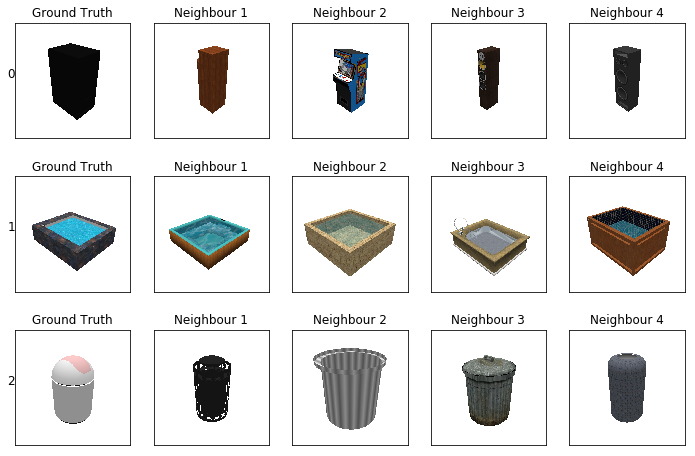

In [7]:
utils.retrieve_images(y_pred, ids, data_dir_val, class_dir, num_KNN=4, max_show=3, shuffle=True)

Enter sentencethis is a grey trash can
Description: this is a grey trash can


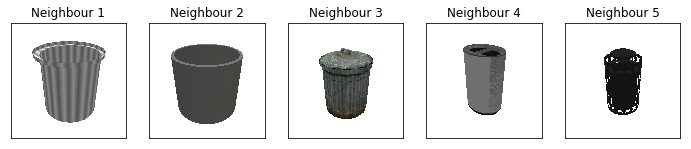

In [8]:
#sentence = 'This is a black chair'
sentence = input("Enter sentence")
utils.retrieve_one_sentence(net, data_dir_val, working_dir, sentence, class_dir, y_pred , ids, shape, num_KNN=5)